# Time Series Analysis

Zhentao Shi


* Practical topics
* Useful in business contexts
* Modeling choices and challenges

* Time Series Regression
* Univariate Time Series Models
* Nonstationary Time Series
* Multivariate Time Series

* Traditionally, small models
* High dimensional time series modeling is work in progress
* Predictive regression

### Common Operations

* Lag Operator

$$L x_t = x_{t-1}$$
$$L^{\tau} x_t = x_{t-\tau}$$ 

* Difference operator
$$\Delta x_t = x_t - x_{t-1} = (1-L) x_t$$

# Lagged Effect

* Interpretation as a generative model

$$y_t = \alpha + \sum_{i=0}^{\infty} \beta_i  x_{t-i} + e_t$$

* Impact multiplier: $\beta_0$
* Cumulated effect (of $\tau$ periods): $\sum_{i=0}^{\tau} \beta_i $
* Equilibrium multiplier: $\sum_{i=0}^{\infty} \beta_i $



# Stationary Time Series

For a univariate time series $(y_t)_{t= - \infty} ^ {\infty}$,
* **Strictly stationary**: joint distribution of any finite coordinate only depends on their relative position.
* **Weakly stationary**: the first two moments of any pair $y_t$ and $y_s$ only depends on their relative position.
    * $E[y_t] = \mu$ for all $t$
    * $\mathrm{var}[y_t] = \sigma^2$ for all $t$
    * $\mathrm{cov}[y_t, y_{t+\tau} ] $ only depends on $\tau$ independent of $t$



This notion can be extended to multiple-variate time series, for example $(y_t, x_t, e_t)$.

### Distributed Lags

* Lagged $x$ on the right-hand side

$$
y_t = \alpha + \sum_{i=0}^{\infty} \beta_i  x_{t-i} + e_t = \alpha + B(L) x_t + e_t 
$$

where $$B(L) = \sum_{i=0}^{\infty} \beta_i L^i$$ is a polynomial of the lag operators.

## Autoregressive model

* Lagged $y$ on the right-hand side

$$
y_t = \alpha + \sum_{i=1}^p \gamma_p y_{t-p} + e_t 
$$ 

can be written as 

$$
C(L) y_t = \alpha + e_t
$$ 

where 

$$
C(L) = 1 -\gamma_1 L - \cdots - \gamma_p L^p
$$ 

is a polynomial of the lag operators.

# Invertibility

If the roots of the polynomial equation $C(z) = 0$ **all** lies **outside** of the unit circle, we say the autoregressive model is invertible.



If $e_t$ is stationary with finite variance and $\alpha=0$ (homogenous difference equation):
* If the module of the smallest root is bigger than 1, $y_t$ is a stationary time series
* If the module of the smallest root is equal to 1, $y_t$ is a **unit root** process
* If the module of the smallest root is smaller than 1, $y_t$ is an **explosive** process


### Numerical Example

* $C(L) = 1 - 0.5L$ is invertible.
* $C(L) = 1 - L$ is non-invertible.
* $C(L) = 1 - 1.1L$ is non-invertible.

In [1]:
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lklkc7ys because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [1]:
import numpy as np

def AR(b, T):
    y = np.zeros(T)
    for t in range(T):
        if t > 0:
            y[t] = b * y[t - 1] + np.random.normal()
    return y


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-t60zxoxq because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


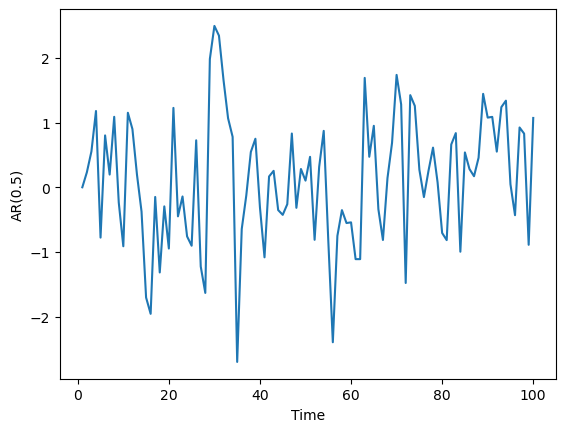

In [2]:
import matplotlib.pyplot as plt

T = 100
y = AR(0.5, T)

plt.plot(range(1, T+1), y)
plt.xlabel("Time")
plt.ylabel("AR(0.5)")
plt.show()


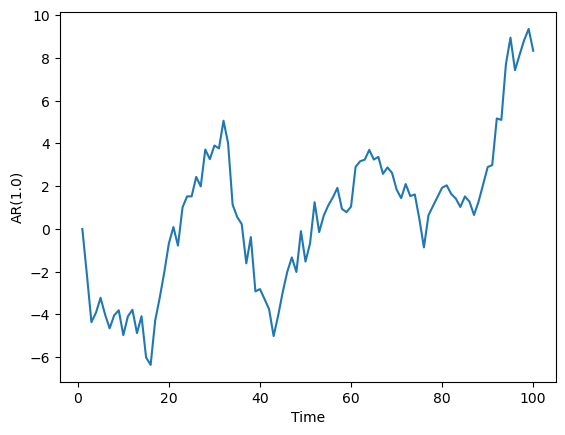

In [3]:
# import matplotlib.pyplot as plt

T = 100
y = AR(1.0, T)

plt.plot(range(1, T+1), y)
plt.xlabel("Time")
plt.ylabel("AR(1.0)")
plt.show()


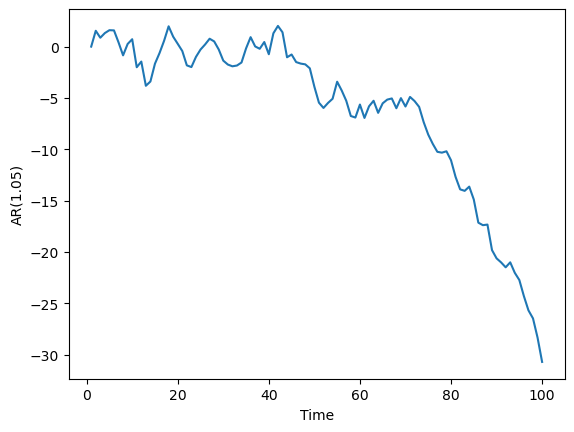

In [5]:
# import matplotlib.pyplot as plt

T = 100
y = AR(1.05, T)

plt.plot(range(1, T+1), y)
plt.xlabel("Time")
plt.ylabel("AR(1.05)")
plt.show()


### Autoregressive Distributed Lag Models


* ARDL(p,r) model:

$$
C(L) y_t = \mu + B(L) x_t + e_t 
$$ 

where 

$$
C(L) = 1 -\gamma_1 L - \cdots - \gamma_p L^p
$$

and 

$$
B(L) =  \beta_0 + \beta_1 L + \cdots + \beta_r L^r.
$$

* **Granger causality**: 

$$
\beta_0 = \beta_1 = \cdots = \beta_r = 0
$$

### Example

* In simple regression form

$$
y_t = \beta_1 + \beta_2 x_t + \beta_3 x_{t-1} + \gamma y_{t-1} + e_t
$$

* Temporal lags of effect. eg: policy lag
* Expectation formed from the past. eg: forecast
* Explicitly depends on history. eg: wealth accumulation


In [4]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd

yf.pdr_override()

POILBREUSDQ = pdr.get_data_fred('POILBREUSDQ') # Brent Oil price
IPB50001SQ = pdr.get_data_fred('IPB50001SQ') # industrial Index (quarterly data)

d0 = pd.merge(POILBREUSDQ, IPB50001SQ, left_index=True, right_index=True).dropna()
d0 = d0.assign(x = pd.Series(d0['POILBREUSDQ'], index=d0.index))
d0 = d0.assign(y = pd.Series(d0['IPB50001SQ'], index=d0.index))

del POILBREUSDQ, IPB50001SQ

print(d0.head())

            POILBREUSDQ  IPB50001SQ          x         y
DATE                                                    
2018-07-01    76.081132    103.8441  76.081132  103.8441
2018-10-01    68.320070    103.9784  68.320070  103.9784
2019-01-01    63.756896    103.0103  63.756896  103.0103
2019-04-01    68.357847    102.3855  68.357847  102.3855
2019-07-01    62.123769    102.4435  62.123769  102.4435


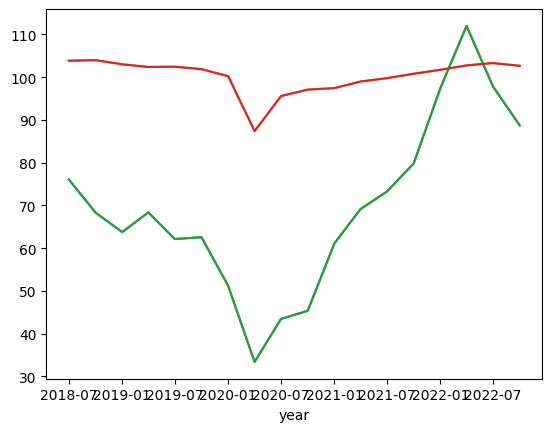

In [6]:
import matplotlib.pyplot as plt

plt.plot(d0.index, d0)
plt.title("")
plt.xlabel("year")
plt.ylabel("")
plt.show()

### ARDL(1,1) regression example

* `dynlm` only works with objects `ts()`. The transformation is essential

In [5]:
import pandas as pd
import numpy as np

# Generate random data for the time series
np.random.seed(42)
y = np.random.randn(100).cumsum()
x = np.random.randn(100).cumsum()

# Create a DataFrame
d0 = pd.DataFrame({'y': y, 'x': x})

In [6]:
import statsmodels.tsa.api as smt

# Define the number of lags
lags = 1

# Fit the VAR model
model = smt.VAR(d0)
results = model.fit(lags)

# Print the summary of the model
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, May, 2023
Time:                     05:58:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.111823
Nobs:                     99.0000    HQIC:                 -0.205468
Log likelihood:          -261.629    FPE:                   0.764093
AIC:                    -0.269103    Det(Omega_mle):        0.719807
--------------------------------------------------------------------
Results for equation y
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.284412         0.156353           -1.819           0.069
L1.y          0.970888         0.021261           45.665           0.000
L1.x         -0.011445         0.037752           -0.303           0.762

Results for equation x

* Differenced dependent variable (`d( )`)

In [7]:
import statsmodels.api as sm

# Calculate the first difference of 'y'
d0['dy'] = d0['y'].diff()

# Prepare the endogenous variable
endog = d0['dy'].iloc[1:].reset_index(drop=True)

# Prepare the exogenous variables
exog = sm.add_constant(d0[['y', 'x']].iloc[:-1]).astype(float).reset_index(drop=True)

# Create and fit the OLS model
model = sm.OLS(endog, exog)
results = model.fit()

# Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     dy   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9598
Date:                Wed, 03 May 2023   Prob (F-statistic):              0.387
Time:                        05:59:01   Log-Likelihood:                -129.74
No. Observations:                  99   AIC:                             265.5
Df Residuals:                      96   BIC:                             273.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2844      0.156     -1.819      0.0


# Spurious Regression


* The two time series $\{y_t\}$ and $\{x_t\}$ are generated independently, so that $E[y_t|x_t] = 0$. 
* However, we observe a high $R^2$ and large t-value if we regression $y_t$ against $x_t$.


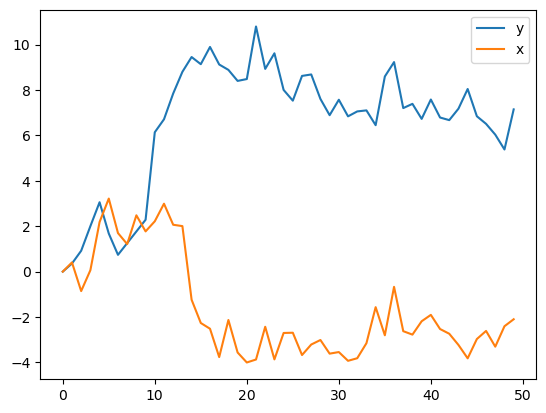

In [10]:
import matplotlib.pyplot as plt

T = 50
a = 1

y = AR(a, T)
x = AR(a, T)

plt.plot(y, label="y")
plt.plot(x, label="x")
plt.ylabel("")
plt.legend()
plt.show()

In [11]:
import statsmodels.api as sm

reg = sm.OLS(y, sm.add_constant(x)).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.37
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.91e-06
Time:                        15:10:21   Log-Likelihood:                -110.42
No. Observations:                  50   AIC:                             224.8
Df Residuals:                      48   BIC:                             228.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2223      0.398     13.135      0.0

### Discovery

* Granger and Newbold (1974): If we naively use 1.96 as the critical value for the $t$-ratio, how often we would reject the null hypothesis that $\beta = 0$?  

* The nominal asymptotic test size is $5\%$ according to the standard asymptotic theory
* The empirical size is about 0.80 in this simulation
* The drastic deviation suggests that the standard asymptotic theory fails in the nonstationary environment.


In [8]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def spurious(i, a, T):
    y = AR(a, T)
    x = AR(a, T)

    reg = sm.OLS(y, sm.add_constant(x)).fit()
    p_val = reg.pvalues[1]
    # save the p-value of the estimate of x's coefficient
    return p_val

out = []
for i in tqdm(range(1000)):
    p_val = spurious(i, 1.0, 100)
    out.append(p_val)

print(np.mean(np.array(out) < 0.05))


100%|██████████| 1000/1000 [00:00<00:00, 1279.49it/s]

0.739


### Autoregression and Moving Average

* Box-Jenkins (1976): ARMA
* No economic theory. For fitting and prediction only.

# A Simple Models

* White noise: $(e_t)_{t=-\infty}^{\infty}$:
    * $E[e_t] = 0$, $E[e_t^2] = \sigma_e^2$, and $E[e_t, e_s] = 0$ for all $t\neq s$. 

# ARMA


* AR(p) $$ y_t = \mu + \gamma_1 y_{t-1} + \cdots \gamma_p y_{t-p} + e_t $$
* MA(q) $$ y_t = \mu + e_t - \theta_1 e_{t-1} - \theta_q e_{t-q} + e_t $$
* ARMA(p,q) $$(1-\Gamma(L) ) y_t = \mu + \Theta (L) e_t$$

Stationarity: in AR form whether all roots lies out of the unit cycle.

# Autocorrelation Patterns


* MA(q): finite dependence
* AR(1): geometric decline
    * $E[ y_t ] = \mu / (1-\gamma_1)$
    * $\mathrm{var}[y_t] = \sigma_e^2 / (1-\gamma_1^2 )$
    * $E[ y_t | y_{t-1} ] = \mu + \gamma_1 y_{t-1}$
    * $\mathrm{var}[y_t | y_{t-1} ] = \sigma_e^2 $
    


# Modeling

* ARIMA(p, r, q) $$(1-\Gamma(L) ) \Delta^r y_t = \mu + \Theta (L) e_t$$
* Transform into stationary time series by taking logarithm and/or difference.
* Fit ARMA(p,q)

In [9]:
reg1 = sm.tsa.ARIMA(d0['x'], order=(2,0,3)).fit()
print(reg1.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -134.525
Date:                Wed, 03 May 2023   AIC                            283.050
Time:                        05:59:26   BIC                            301.286
Sample:                             0   HQIC                           290.431
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8361      1.396      0.599      0.549      -1.899       3.571
ar.L1          0.2069      0.615      0.337      0.736      -0.998       1.412
ar.L2          0.6896      0.622      1.110      0.2

In [10]:
reg2 = sm.tsa.ARIMA(d0['x'], order=(2,1,3)).fit()
print(reg2.params)

ar.L1     0.680124
ar.L2    -0.853375
ma.L1    -0.875837
ma.L2     1.175099
ma.L3    -0.313202
sigma2    0.749813
dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Seasonality

* Generated due to sampling frequency
  * Eg: traffic data; electronic consumption
* Add dummies to control seasonality

# Estimation

* MLE for MA(q)
* MLE for ARMA(p,q)
* OLS for AR(p)

# Model Choice

Information criteria. 

Let $k$ be the total number of slope coefficient in the model.

* Akaike information criterion: $\log( \hat{\sigma}^2 ) + 2\times (k / T )$. 
    * Tend to overfit, but better for prediction
* Bayesian information criterion: $\log( \hat{\sigma}^2 ) + \log(T) \times (k / T )$
    * Model selection consistent
    
Information criteria are not restricted to time series regressions. They are general statistical measures for model/variable selection.

In [15]:
print(reg1.aic)
print(reg2.aic)

283.05009143515383
268.941340403703


# Unit Root

* AR(1) with AR coefficient equals 1. $$y_t = \mu + y_{t-1} + e_t $$
* Nonstationary
* Brownian motion: normal innovation
* Random walk

## Implication
* conditional and unconditional mean
* conditional and unconditional variance
* $h$-period ahead forecast

## Distribution
The OLS estimator 

$$
T(\hat{\gamma}_1 - 1) \stackrel{d}{\to} \text{ a stable distribution}.
$$

but the asymptotic distribution is not normal. 

[*********************100%***********************]  1 of 1 completed


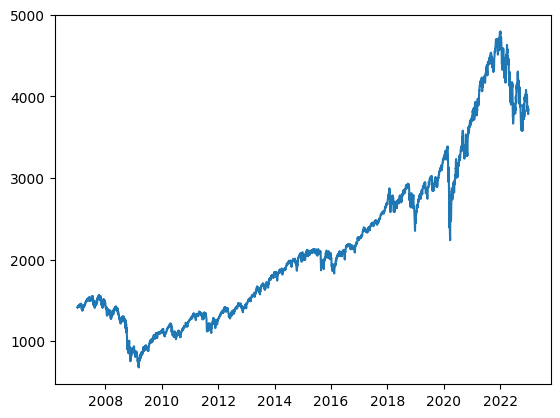

Date
2022-12-23    3844.820068
2022-12-27    3829.250000
2022-12-28    3783.219971
2022-12-29    3849.280029
2022-12-30    3839.500000
Name: Close, dtype: float64


In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

# Download S&P 500 (^GSPC) data
start_date = '2007-01-01'
end_date = '2023-01-01'
ticker = '^GSPC'
sp500_data = yf.download(ticker, start=start_date, end=end_date)
y = sp500_data['Close']

plt.plot(y)
plt.show()

print(y.tail())

### Hypothesis Testing

* Null hypothesis: unit root.
$$ \Delta y_t = \mu + (\gamma_1 - 1 ) y_{t-1} + e_t = \mu+ \theta y_{t-1} + e_t$$
where $ \theta = \gamma_1 - 1 $. Under the null, $\theta = 0$.

* The $t$-statistic is the test statistic for the Dicky-Fuller test.
* Under the null, the $t$-statistic asymptotically follows a pivotal distribution.


### Numerical Example


* In this numerical example, the test does not reject the null.

Notice: the test is one-sided.


In [12]:
from statsmodels.tsa.stattools import adfuller
y = sp500_data['Close']
result = adfuller(y, regression='c', autolag='AIC')
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(key, value)

ADF Statistic:  -1.2358351946233237
p-value:  0.6579935484513549
Critical Values:
1% -3.4356006420838963
Critical Values:
5% -2.8638586845641063
Critical Values:
10% -2.5680044958343604


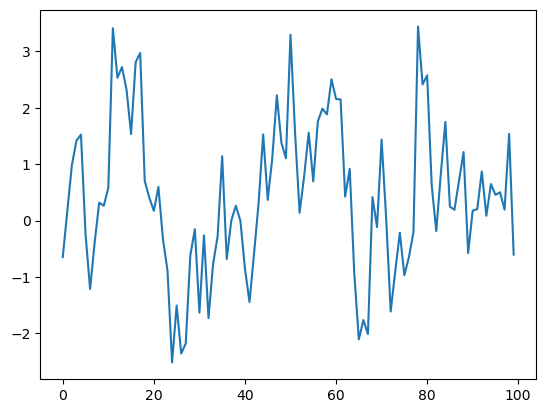

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

y = sm.tsa.ArmaProcess(ar=[1, -0.8], ma=[1]).generate_sample(nsample=100)

plt.plot(y)
plt.show()



### Simulation Dicky-Fuller Distribution

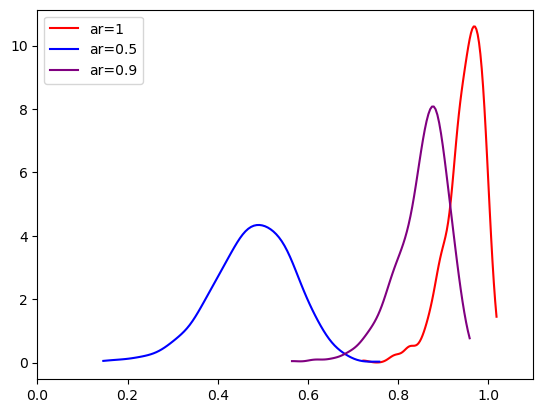

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from scipy.stats import gaussian_kde

def generate_ar_series(ar, n):
    y = np.zeros(n)
    e = np.random.randn(n)

    for i in range(1, n):
        y[i] = ar * y[i - 1] + e[i]

    return y

def DF_sim(ar):
    Rep = 500
    n = 100

    B_hat = np.zeros(Rep)

    for r in range(Rep):
        y = generate_ar_series(ar, n)
        reg_dyn = OLS(y[1:], np.vstack([np.ones(n-1), y[:-1]]).T).fit()
        B_hat[r] = reg_dyn.params[1]

    return B_hat

def plot_density(B, color, label):
    density = gaussian_kde(B)
    x = np.linspace(min(B), max(B), 100)
    plt.plot(x, density(x), color=color, label=label)

B = DF_sim(1)
plot_density(B, color="red", label="ar=1")

B = DF_sim(0.5)
plot_density(B, color="blue", label="ar=0.5")

B = DF_sim(0.9)
plot_density(B, color="purple", label="ar=0.9")

plt.xlim(0, 1.1)
plt.legend()
plt.show()

## Specification of DF test

* The error term must be a white noise for the DF distribution
* DF test's critical values vary with the specfication of drift and/or trend
* Augmented Dicky-Fuller test: add more differenced lag terms

## Other tests
* Phillips-Perron test
* KPSS test

In [2]:
from arch.unitroot import PhillipsPerron

pp_test = PhillipsPerron(y)
print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.097
P-value                         0.950
Lags                               31
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [5]:
from statsmodels.tsa.stattools import kpss

result = kpss(y, regression='c')
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(key, value)

KPSS Statistic: 8.943887733081768
p-value: 0.01
Critical Values:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739


d:\Users\AW\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# Time Series Filtering

**Hodrick-Prescott filter**: Decompose a time series into *trend* and *cycle*

$$\hat{f}_{t}=\arg \min_{f_{t}}\left\{ \sum_{t=1}^{n}\left( y_{t}-f_{t}\right)^{2}+\lambda \sum_{t=3}^{n}\left( \Delta ^{2}f_{t}\right) ^{2}\right\}.$$
    
* The original paper (Hodrick Prescott, 1980, 1997) suggest $\lambda = 1600$ for quarterly data.
* $\lambda = 1600$ is also the base of adjustment for different time series data frequency.

* Phillips and Shi (2021)
* Mei, Phillips and Shi (2023)

   Unnamed: 0         x
0           1  5.833333
1           2  5.100000
2           3  5.266667
3           4  5.600000
4           5  5.133333


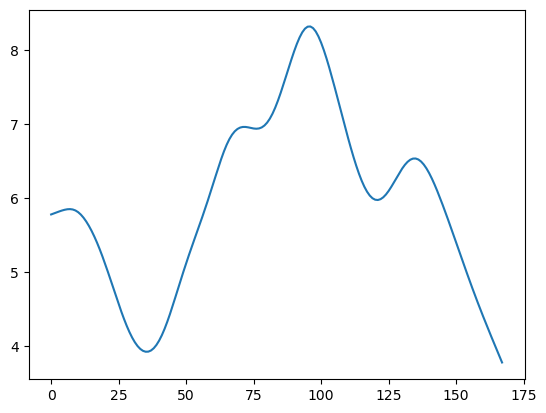

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

file_path = 'data_example/unemp.csv'
unemp_data = pd.read_csv(file_path)

print(unemp_data.head())

unemp_hp = sm.tsa.filters.hpfilter(unemp_data['x'])

plt.plot(unemp_hp[1])
plt.show()

# Cointegration

In a regression
$$y_t = \beta x_t  + e_t$$

* If $y_t$ and $x_t$ are I(1) series
* But a linear combination $e_t = y_t - \beta x_t $ is I(0)

then we say $y_t$ and $x_t$ are cointegrated.

[*********************100%***********************]  1 of 1 completed


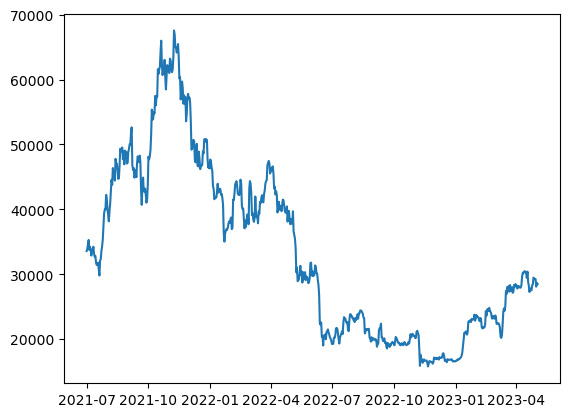

[*********************100%***********************]  1 of 1 completed


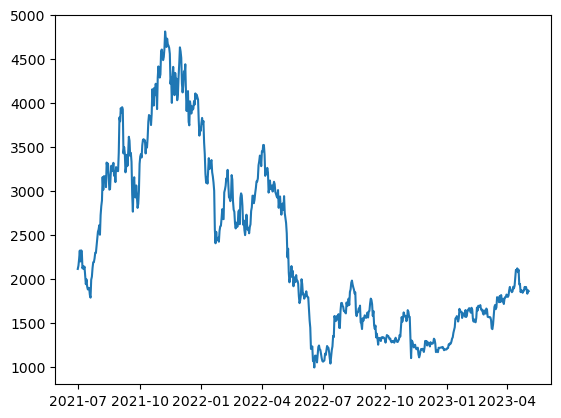

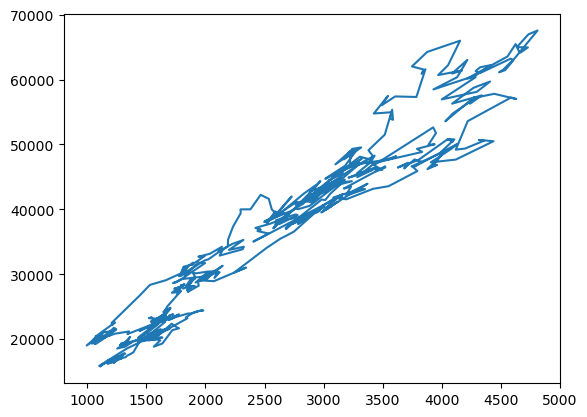

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt

BTC = yf.download("BTC-USD", start="2021-07-01")["Close"]
plt.plot(BTC)
plt.show()

ETH = yf.download("ETH-USD", start="2021-07-01")["Close"]
plt.plot(ETH)
plt.show()

plt.plot(ETH.values, BTC.values)
plt.show()


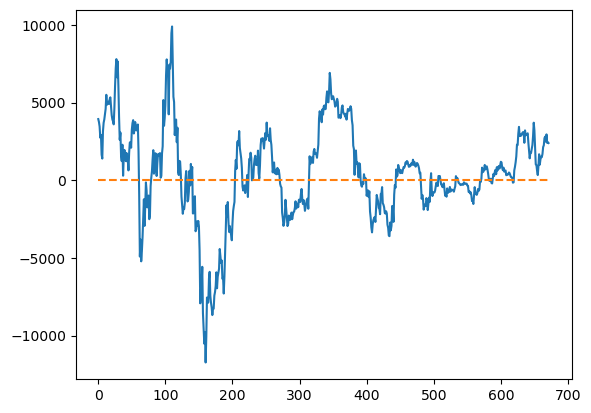

In [19]:
import statsmodels.api as sm

# Convert BTC and ETH to NumPy arrays
BTC = BTC.values
ETH = ETH.values

# Fit linear regression model
reg = sm.OLS(BTC, ETH).fit()

# Plot residuals
plt.plot(reg.resid)
plt.plot([0, len(reg.resid)], [0, 0], linestyle='--')
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

# Calculate ADF test on residuals
adf_result = adfuller(reg.resid, autolag='AIC')

# Print summary of ADF test results
print("ADF Test Results:")
print(f"Test Statistic: {adf_result[0]}")
print(f"P-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")

ADF Test Results:
Test Statistic: -3.5453383288029263
P-value: 0.006896255909168019
Critical Values: {'1%': -3.4403119951958754, '5%': -2.8659357770630662, '10%': -2.5691109142928195}


period: Time index from 1974:Q1 until 1987:Q3.
* `LRM`	Logarithm of real money, M2.
* `LRY`	Logarithm of real income.
* `LPY`	Logarithm of price deflator.
* `IBO`	Bond rate.
* `IDE`	Bank deposit rate.

# Source of Cointegration

Common shock is the source of cointegration

For example, if $y_{1t} = \mu_1 + \beta_1 t + e_{1t}$ and $y_{2t} = \mu_2 + \beta_2 t + e_{2t}$, where $e_{1t}$ and $e_{2t}$ are two white noises, then the cointegration vector must be $(1,\theta)$ where $$\theta = - \beta_1 / \beta_2.$$ The first coefficient 1 in this cointegration vector is for normalization.

In this example, the common trend is a determistic one. In other examples, they can also share a stochastic trend.

## Definitions

More generally, for an $m$-vector $y_t$ is cointegrated if there exists a parameter vector $\gamma$ (normalize the first element to be 1) such that $y_t ' \gamma$ is I(0).



* The number of linear independent cointegrated vectors is called the **cointegration rank**. 
  * Cointegration rank arranges from 1 to $m-1$.

# Error Correction Model

* Consider an ARDL(1,1) model

$$ 
y_t  = \mu + \beta_0 x_t + \beta_1 x_{t-1} + \gamma_1 y_{t-1} + e_t. 
$$

* If $\beta_0 = \beta_1 = 0$, no **Granger causality** between $X$ and $Y$.
* Granger causality is a linear predictive relationship



### Reformulation

* When $X$ and $Y$ are both nonstationary, standard OLS inference is invalid. 

* Subtract $y_{t-1}$ from both sides of 

$$
\begin{align*}
\Delta y_t & = \mu + \beta_0 x_t + \beta_1 x_{t-1} + (\gamma_1 -1 ) y_{t-1} + e_t  \\
           & = \mu + \beta_0 \Delta x_t + (\beta_1 + \beta_0) x_{t-1} + (\gamma_1 -1 ) y_{t-1} + e_t  \\
           & = \mu + \beta_0 \Delta x_t + (\gamma_1 -1 )( y_{t-1} - \theta x_{t-1} ) + e_t  
\end{align*}
$$

where $\theta =  (\beta_1 + \beta_0)/(1 - \gamma_1)$.

* A short-run relationship $\Delta y_t \sim \mu + \beta_0 \Delta x_t + e_t$.
* An long-run equilibrium error $(\gamma_1 - 1 ) (y_{t-1} - \theta x_{t-1} ) $
  * Corrects the error term the differenced regression to maintain $\beta_0$

ECM is useful when $y_t$ is nonstationary


* First difference recovers stationarity
* Identify spurious regression (when $\beta_0 = 0$)
* ECM can be estimated either by 
  * OLS or NLS (constraints among parameters)
  * MLE

# Predictive Regression

In the regression 

$$
y_t = \mu_y + \beta_1 x_{t-1} + e_{yt}
$$

* $y_t$ is stationary 
* The predictor $x_t$ is highly persistent:

$$
x_t = \mu_x + \gamma x_{t-1} + e_{xt}
$$ 

with $\gamma$ is close to 1.

* Even if $E[e_{yt} | x_{t-1} ] = 0$, OLS estimator of $\beta_1$ is biased in finite sample when $e_{yt}$ and $e_{xt}$ are correlated (Stambaugh, 1999).

* Lee, Shi and Gao (2018): "[On LASSO for Predictive Regression](https://arxiv.org/abs/1810.03140)," arXiv: 1810.03140
* Find new behavior of popular machine learning methods in predictive regression.

In [21]:
import pandas as pd

# Read the CSV file
d0 = pd.read_csv("data_example/PredictorData2021.csv")

# Filter the data
d0 = d0[d0['yyyymm'] > 196000]

# Select specific columns
d0 = d0.iloc[:, [0, 1, 4, 5, 8, 9, 11, 12, 13, 14, 15, 10]]

# Print the first few rows of the DataFrame
print(d0.head())


      yyyymm  Index       b/m     tbl     lty      ntis      infl     ltr  \
1068  196001  55.61  0.499502  0.0435  0.0441  0.022116 -0.003401  0.0112   
1069  196002  56.12  0.493557  0.0396  0.0429  0.024037  0.003413  0.0204   
1070  196003  55.34  0.549798  0.0331  0.0411  0.025593  0.000000  0.0282   
1071  196004  54.37  0.563404  0.0323  0.0426  0.025577  0.003401 -0.0170   
1072  196005  55.83  0.541966  0.0329  0.0417  0.024414  0.000000  0.0152   

       corpr      svar       csp   Rfree  
1068  0.0107  0.000919  0.000889  0.0033  
1069  0.0128  0.001150  0.000661  0.0029  
1070  0.0191  0.000969  0.000361  0.0035  
1071 -0.0022  0.000645  0.000121  0.0019  
1072 -0.0021  0.000424 -0.000036  0.0027  


# Vector Autoregression (VAR)

Christopher Sims (Nobel Prize 2011)

An $m$-equation system
$$ y_t = \mu + \Gamma_1 y_{t-1} + \cdots + \Gamma_p y_{t-p} + v_t $$
where $E[ v_t v_t'] = \Omega$.

For prediction purpose, as a reduced-form of structural simultaneous equations.

### Estimation

* For consistency and asymptotic normality, use OLS equation by equation
* For asymptotic efficient, use multiple-equation GLS



# Invertibility

Write the VAR(p) as
$$ (I_m - \Gamma (L) ) y_t = \mu + v_t $$ 
where $\Gamma(z) = \Gamma_1 z + \cdots + \Gamma_p z^p$. 

Stable means that all roots of the $p$th order polynomial equation $$ I_m - \Gamma(z)  = 0_m $$ lies out of the unit circle.

# Impulse Response Function

IRF characterizes the diffusion of an exogenous shock with the dynamic system.

$$
\begin{align*}
y_t & = (I_m - \Gamma(L) )^{-1} (\mu + v_t) \\
    & = \bar{y} + \left( v_t + \sum_{i=1}^{\infty} A_i v_{t-i} \right)
\end{align*}
$$ where $\bar{y} = (I_m - \Gamma(L) )^{-1} \mu = ( I_m + \sum_{i=1}^{\infty} A_i ) \mu $.

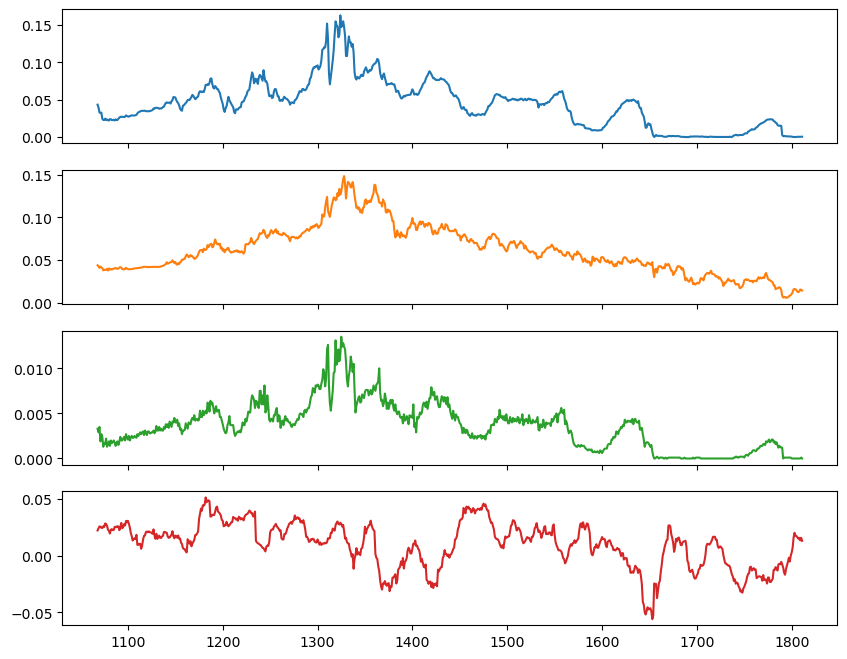

In [22]:
import matplotlib.pyplot as plt

# Select specific columns
d1 = d0[['tbl', 'lty', 'Rfree', 'ntis']]

# Plot the data
d1.plot(subplots=True, layout=(4, 1), figsize=(10, 8), title="", legend=False)
plt.show()


## Variables

* `ntis`: net equity expansion
* `tbl`: treasury bill rates () The stationary predictors
* `lty`: long-term yield
* `Rfree`: risk-free rate

In [23]:
import statsmodels.tsa.api as tsa

# Fit a VAR model with lag order 2
mod_var = tsa.VAR(d1).fit(2)

# Print the model summary
print(mod_var.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, May, 2023
Time:                     06:02:55
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -49.8867
Nobs:                     742.000    HQIC:                  -50.0241
Log likelihood:           14415.5    FPE:                1.72731e-22
AIC:                     -50.1103    Det(Omega_mle):     1.64598e-22
--------------------------------------------------------------------
Results for equation tbl
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.000209         0.000370           -0.563           0.573
L1.tbl           1.274885         0.039094           32.611           0.000
L1.lty           0.396384         0.051362            7.718           0.000
L1.Rfr

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


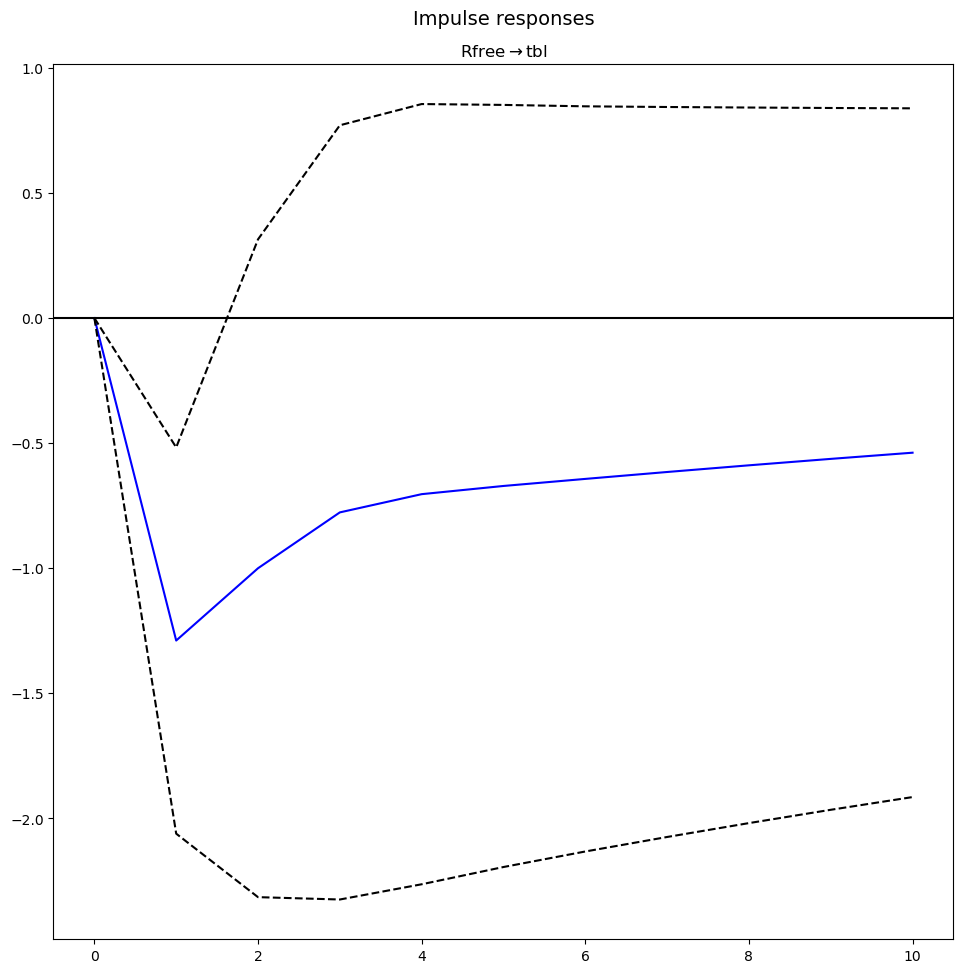

In [24]:
import matplotlib.pyplot as plt

# Compute the impulse response function
irf_var = mod_var.irf(10)  # Choose the number of periods for IRF, e.g., 10

# Plot the IRF
irf_var.plot(impulse='Rfree', response='tbl')
plt.show()


# Structural VAR

* Unrestricted VAR: too many parameters? $m+p\cdot m^2 + m(m+1)/2$
* Use economic theory to reduce the number of unknown parameters

# VECM Representation

Suppose there are $r$ cointegration relationship in $y_t$. For the $m$-equation VAR system 

$$
y_t = \Gamma y_{t-1} + e_t,
$$ 

we can rewrite it as

$$ 
\Delta y_t = (\Gamma - I_m) y_{t-1} + e_t = \Pi y_{t-1} + e_t.
$$

* Since LHS is stationary, the $m\times m$ matrix $\Pi = \Gamma - I_m$ on the RHS must only have rank at most $r$. 
* Otherwise, the RHS will be I(1) and the two sides of the equation are unbalanced.

# Johansen Test


* VECM is the base for the cointegration rank test (Johansen, 1992).

* Numerical examaple: The result shows that there is only 1 cointegration relationship among the 4 time series.

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

# Assuming d1 is a pandas DataFrame
d1.index = pd.period_range('1960-01', periods=len(d1), freq='M')

# Perform the Johansen cointegration test
result = coint_johansen(d1, det_order=0, k_ar_diff=2)

# Print the results
print(result.lr1)
print(result.lr2)
print(result.cvt)
print(result.cvm)

# Fit the VECM model
vecm = VECM(d1, k_ar_diff=2, coint_rank=2, deterministic="co")
vecm_fit = vecm.fit()

# Print the VECM model results
print(vecm_fit.summary())


[255.10547411  48.31073496  19.34099369   2.65785984]
[206.79473915  28.96974127  16.68313385   2.65785984]
[[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[[25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Det. terms outside the coint. relation & lagged endog. parameters for equation tbl
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.963      0.336      -0.001       0.000
L1.tbl         0.1870      0.063      2.952      0.003       0.063       0.311
L1.lty         0.3646      0.050      7.262      0.000       0.266       0.463
L1.Rfree       0.9519      0.531      1.792      0.073      -0.089       1.993
L1.ntis       -0.0214      0.036     -0.596      0.551      -0.092       0.049
L2.tbl        -0.2353      0.058     -

This code need Professor Shi to implement. VarResults function is to convert VECM to a Var, but I am not sure what arguments I should imput.

In [26]:
# Import required packages
import pandas as pd
from statsmodels.tsa.api import VECM
from statsmodels.tsa.vector_ar.irf import IRAnalysis
from statsmodels.tsa.vector_ar.var_model import VARResults


# Convert the VECM to a VAR
var_model = VARResults(vecm_fit.resid, vecm_fit.coefs, vecm_fit.sigma_u, vecm_fit.k_ar_diff)

# Plot the impulse response functions
var_model.plot(impulse='Rfree', response='tbl')
plt.show()


AttributeError: 'VECMResults' object has no attribute 'coefs'

### Estimating VECM by OLS

In [30]:
from statsmodels.tsa.vector_ar.vecm import cajorls

# Fit OLS regression to VECM
mod_VECM_ols = cajorls(vecm.model, 2)

# Print results
print(mod_VECM_ols.summary())

ImportError: cannot import name 'cajorls' from 'statsmodels.tsa.vector_ar.vecm' (/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/vector_ar/vecm.py)

#  Future of Time Series Study

* Classical methods
* Time series model for discrete choice model
* Time series dimension of big data
    * Unstructured data
    * Panel data